In [2]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Make sure you have downloaded and installed FedScale
from fedscale.dataloaders.femnist import FEMNIST
from fedscale.dataloaders.utils_data import get_data_transform
from fedscale.dataloaders.divide_data import DataPartitioner
from fedscale.cloud.config_parser import args

In [6]:
train_transform, test_transform = get_data_transform('mnist')
train_dataset = FEMNIST('./benchmark/dataset/data/femnist', dataset='train', transform=train_transform)
test_dataset = FEMNIST('./benchmark/dataset/data/femnist', dataset='test', transform=test_transform)

In [7]:
args.task = 'cv'
training_sets = DataPartitioner(data=train_dataset, args=args, numOfClass=62)
training_sets.partition_data_helper(num_clients=None, data_map_file='./benchmark/dataset/data/femnist/client_data_mapping/train.csv')
#testing_sets = DataPartitioner(data=test_dataset, args=args, numOfClass=62, isTest=True)
#testing_sets.partition_data_helper(num_clients=None, data_map_file='./benchmark/dataset/data/femnist/client_data_mapping/train.csv')

In [8]:
print(f'Total number of data samples: {training_sets.getDataLen()}')
print(f'Total number of clients: {training_sets.getClientLen()}')

Total number of data samples: 637877
Total number of clients: 2800


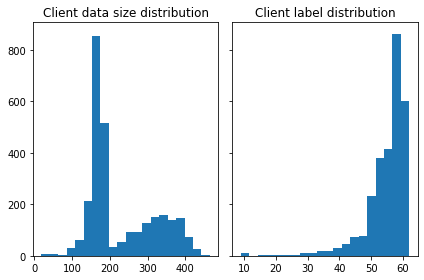

In [9]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
size_dist = training_sets.getSize()['size']

n_bins = 20
axs[0].hist(size_dist, bins=n_bins)
axs[0].set_title('Client data size distribution')

label_dist = training_sets.getClientLabel()
axs[1].hist(label_dist, bins=n_bins)
axs[1].set_title('Client label distribution')

plt.show()

In [10]:
rank=1
isTest = False
dropLast =  True
partition = training_sets.use(rank - 1, isTest)
num_loaders = min(int(len(partition)/ args.batch_size/2),  args.num_loaders)
dataloader = DataLoader(partition, batch_size=16, shuffle=True, pin_memory=True, timeout=60, num_workers=num_loaders, drop_last=dropLast)

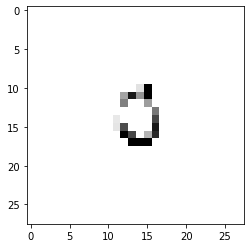

In [11]:
for data in iter(dataloader):
   plt.imshow(np.transpose(data[0][0].numpy(), (1, 2, 0)))
   break

In [13]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Make sure you have downloaded and installed FedScale
from fedscale.dataloaders.wisdm import WISDM
from fedscale.dataloaders.pamap2 import PAMAP2
from fedscale.dataloaders.utils_data import get_data_transform
from fedscale.dataloaders.divide_data import DataPartitioner
from fedscale.cloud.config_parser import args

In [14]:
# train_transform, test_transform = get_data_transform('mnist')
train_dataset = PAMAP2('./benchmark/dataset/data/PAMAP2', dataset='train')
test_dataset = PAMAP2('./benchmark/dataset/data/PAMAP2', dataset='test')

In [15]:
args.task = 'har'
training_sets = DataPartitioner(data=train_dataset, args=args, numOfClass=25)
training_sets.partition_data_helper(num_clients=None, data_map_file='./benchmark/dataset/data/PAMAP2/client_data_mapping/train.csv')

In [16]:
print(f'Total number of data samples: {training_sets.getDataLen()}')
print(f'Total number of clients: {training_sets.getClientLen()}')

Total number of data samples: 23016
Total number of clients: 9


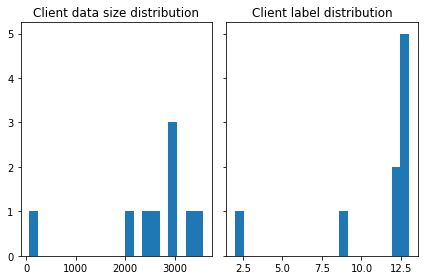

In [17]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
size_dist = training_sets.getSize()['size']

n_bins = 20
axs[0].hist(size_dist, bins=n_bins)
axs[0].set_title('Client data size distribution')

label_dist = training_sets.getClientLabel()
axs[1].hist(label_dist, bins=n_bins)
axs[1].set_title('Client label distribution')

plt.show()

In [18]:
rank=1
isTest = False
dropLast =  True
partition = training_sets.use(rank - 1, isTest)
num_loaders = min(int(len(partition)/ args.batch_size/2),  args.num_loaders)
dataloader = DataLoader(partition, batch_size=16, shuffle=True, pin_memory=True, timeout=60, num_workers=num_loaders, drop_last=dropLast)

In [19]:
for data in iter(dataloader):
   print(data[0][0])
   break

tensor([ 4.0564e+03,  1.3900e+02,  3.0812e+01, -1.0194e+01, -1.5377e+00,
         1.3243e+00, -1.0186e+01, -1.5789e+00,  1.4566e+00,  1.1448e-01,
        -3.0940e-01, -5.9349e-01,  3.8254e+01, -1.9295e+01, -2.3803e+01,
         6.9050e-01,  3.1234e-01, -3.3271e-01, -5.0672e-01,  3.4250e+01,
         7.2580e-01,  9.8136e+00, -6.6801e-02,  5.2513e-01,  9.7869e+00,
         2.9980e-01, -1.9403e-02,  6.3595e-02,  4.7673e-02, -1.8501e+01,
        -2.9954e+01,  1.4411e+01,  3.2374e-01, -3.9865e-01, -5.2032e-01,
        -6.7946e-01,  3.1812e+01,  1.2818e+01, -2.7048e+00, -3.7218e+00,
         1.2732e+01, -2.6892e+00, -3.3716e+00,  1.7339e-01, -9.7776e-02,
         4.1496e-02, -3.9075e+01,  1.3553e+01, -9.6230e+00,  5.9308e-01,
         1.6577e-01,  7.6605e-01, -2.5562e-02])
